<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C2/C2.html"><img src="../data/C2_nav.png" width="100"  style="float:right;" alt="C2"></a>
<h1> Exponential Function</h1> 
</div>

<br/>

<p>
In this notebook, we review some properties of the complex exponential function. This function plays an important role for defining and understanding the Fourier transform, see Section 2.3.2 of <a href="http://www.music-processing.de">[Müller, FMP, Springer 2015]</a>.
</p> 

## Power Series

One encounters the **real exponential function** $\exp:\mathbb{R}\to \mathbb{R}$ in the context of many mathematical applications, and the function can be characterized in many different ways. Historically, the exponential function was studied already by **Johann Bernoulli** in the $17^\mathrm{th}$ century when considering **interest rates**: Assume that an amount of $1$ earns an interest $a$ at an annual rate compounded monthly. Then the interest earned each month is $\frac{a}{12}$ times the current value, so that each month the total value is multiplied by $\left(1+\frac{a}{12}\right)$ and the value at the end of the year is $\left(1+\frac{a}{12}\right)^{12}$. In case the interest is compounded every day, it becomes $\left(1+\frac{a}{365}\right)^{365}$. Letting the time intervals grow per year by making them shorter leads to the limit definition of the exponential function

$$\exp(a) = \mathrm{lim}_{n\to\infty} \left(1+\frac{a}{n}\right)^{n},$$

which was first given by **Leonhard Euler**. The constant $e:=\exp(1)\approx 2.71828 \ldots$ is also known as **Euler's number**. By expanding the $n$-fold product in the above definition, one can show that the exponential function can also be expressed by the following power series:

$$\exp(a) := \sum_{n=0}^{\infty} \frac{a^n}{n!} = 1 + a + \frac{a^2}{1 \cdot 2} + \frac{a^3}{1 \cdot 2 \cdot 3} + \dots$$

with $a\in\mathbb{R}$. Replacing in the power series the real-valued variable $a\in\mathbb{R}$ by a complex-valued variable $c\in\mathbb{C}$, one still obtains the **complex exponential function** $\exp:\mathbb{C}\to \mathbb{C}$ given by 

$$\exp(c) := \sum_{n=0}^{\infty} \frac{c^n}{n!} = 1 + c + \frac{c^2}{1 \cdot 2} + \frac{c^3}{1 \cdot 2 \cdot 3} + \dots$$

Based on the definition of the complex exponential function, one can also extend the definition of trigonometric functions (e.g. $\sin$ and $\cos$) to complex arguments.

The following implementation yields an approximation of the power series by considering only the first $N$ terms specified by the parameter $N\in\mathbb{N}$. For the case $c=1$, this yields an approximation for the number $e$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def exp_power_series(c, N):
    """Compute power series for exponential function

    Notebook: C2_ExponentialFunction.ipynb

    Args:
        c: Complex number
        N: Number of summands used for approximation

    Returns:
        exp_c: Approximation of exp(c)
    """    
    exp_c = 1
    c_power = 1
    nfac = 1
    for n in range(1, N):
        nfac *= n
        c_power *= c 
        exp_c += c_power / nfac
    return exp_c

c=1
print('Approximation (N =  1):', exp_power_series(c, 1))
print('Approximation (N =  2):', exp_power_series(c, 2))
print('Approximation (N =  4):', exp_power_series(c, 4))
print('Approximation (N =  8):', exp_power_series(c, 8))
print('Approximation (N = 12):', exp_power_series(c, 12))
print('Numpy:                 ', np.exp(c))

Approximation (N =  1): 1
Approximation (N =  2): 2.0
Approximation (N =  4): 2.6666666666666665
Approximation (N =  8): 2.7182539682539684
Approximation (N = 12): 2.718281826198493
Numpy:                  2.718281828459045


## Exponentiation Identity and Euler's Formula 

Based on the power series definition, one may prove two famous formulas of the exponential function that explain many of its properties. The first formula is knowns as **exponentiation identity** and says that 

$$
  \exp(c_1 + c_2) = \exp(c_1)\cdot \exp(c_2)
$$

for any complex numbers $c_1, c_2\in\mathbb{C}$. In particular, this property explains the exponential increase for real arguments. For example, 

$$
  \exp(n) = \exp(1+1+\ldots +1) = \exp(1)^n = e^n
$$

for $n\in\mathbb{N}$. The second famous formula, which is known as **Euler's formula**, relates the values of the exponential function at purely imaginary arguments to trigonometric functions. It states that for the complex number $c = i\gamma$ with some real-valued $\gamma\in\mathbb{R}$ one has the identity 

$$\mathrm{exp}(i\gamma) = \cos(\gamma) + i\sin(\gamma) .$$

Actually, starting with the real sine and cosine functions, one often defines $\mathrm{exp}(i\gamma)$ by means of the Euler formula (rather than using the power series). This explains the periodic behavior of the real and imaginary part of $\exp$ along the imaginary (vertical) axis as shown in the next figure. 

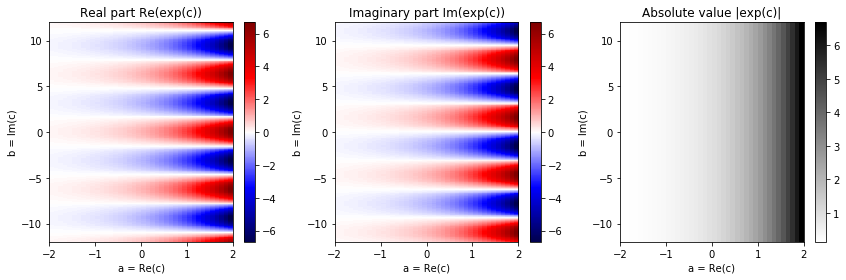

In [2]:
A, B = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-12, 12, 0.1))
C = A + B*1j
f_exp = np.exp(C)

plt.figure(figsize=(12, 4))
extent = [-2, 2, -12, 12]
plt.subplot(1, 3, 1)
plt.imshow(np.real(f_exp),  aspect='auto', cmap='seismic', origin='lower', extent=extent)
plt.title('Real part Re(exp(c))')
plt.xlabel('a = Re(c)')
plt.ylabel('b = Im(c)')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(np.imag(f_exp),  aspect='auto', cmap='seismic', origin='lower', extent=extent)
plt.title('Imaginary part Im(exp(c))')
plt.xlabel('a = Re(c)')
plt.ylabel('b = Im(c)')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(np.abs(f_exp),  aspect='auto', cmap='gray_r', origin='lower', extent=extent)
plt.title('Absolute value |exp(c)|')
plt.xlabel('a = Re(c)')
plt.ylabel('b = Im(c)')
plt.colorbar()
plt.tight_layout()

## Basic Properties

The exponential function has a number of interesting properties:

\begin{eqnarray}
\exp(i\gamma) & = & \exp(i(\gamma+2\pi)) \\
|\exp(i\gamma)|  & = & 1 \\
\overline{\exp(i\gamma)} & = & \exp(-i\gamma) \\
\exp(i(\gamma_1+\gamma_2)) & = & \exp(i\gamma_1) \exp(i\gamma_2) \\
\frac{d\exp(i\gamma)}{d\gamma} & = & i\exp(i\gamma)
\end{eqnarray}

In particular, note that the complex values $\mathrm{exp}(i\gamma)$ lie on the unit circle of the complex plane for all $\gamma\in\mathbb{R}$. Furthermore, due to periodicity, it suffices to consider $\gamma\in[0,2\pi)$. In fact, $\gamma$ encodes the angle (in radians) of the complex number $c = \mathrm{exp}(i\gamma)$, while $|c|=1$. The following visualization shows how the values $\mathrm{exp}(i\gamma)$ change when increasing the angle $\gamma$ from $0$ to $2\pi$:

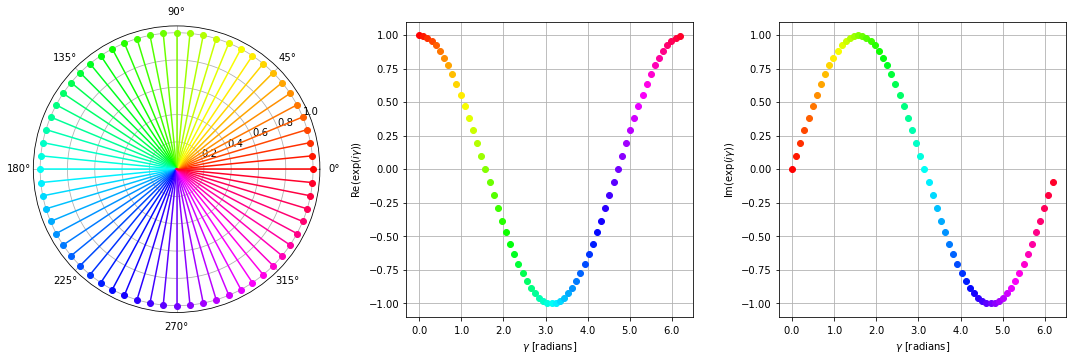

In [3]:
from matplotlib import pyplot as plt
from matplotlib import ticker 
%matplotlib inline

cmap = plt.cm.get_cmap('hsv') # hsv is nice because it is a circular color map

N = 64

fig = plt.figure(figsize=(5 * 3, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='polar')
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

for i in range(N):
    gamma = 2 * np.pi * i / N
    c = np.exp(1j * gamma)
    color = cmap(i / N)
    ax1.plot([0, np.angle(c)], [0, np.abs(c)], color=color)
    ax1.plot(np.angle(c), np.abs(c), 'o', color=color)
    ax2.plot(gamma, np.real(c), 'o', color=color)
    ax3.plot(gamma, np.imag(c), 'o', color=color)
    
ax2.grid()
ax2.set_xlabel('$\gamma$ [radians]')
ax2.set_ylabel('$\mathrm{Re}(\exp(i \gamma))$')
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%s$')) 

ax3.grid()
ax3.set_xlabel('$\gamma$ [radians]')
ax3.set_ylabel('$\mathrm{Im}(\exp(i \gamma))$')
ax3.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%s$')) 
plt.tight_layout()

## Roots of Unity

Let $N \in \mathbb{N}_{>0}$ be a positive integer. A complex number $\rho \in \mathbb{C}$ is called an $N^\mathrm{th}$ **root of unity** if $\rho^N = 1$. It is not hard to see that there are exactly $N$ distinct $N^\mathrm{th}$ roots of unity. Additionally, if $\rho^n \neq 1$ for all $n\in [1:N-1]$, it is called a **primitive** $N^\mathrm{th}$ root of unity. 

With the properties mentioned above, it is easy to see that $\rho_N:=\exp(2 \pi i / N)$ is such a **primitive** $N^\mathrm{th}$ root of unity. All $N^\mathrm{th}$ roots of unity can be generated by considering powers of $\rho_N$:

$$1=\rho_N^0, \quad \rho_N^1, \quad \rho_N^2, \quad ...,\quad \rho_N^{N-1}$$

The following plot shows all roots of unity for different integers $N \in \mathbb{N}_{>0}$. The primitive roots are indicated in red. 

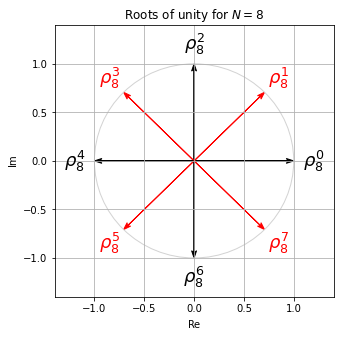

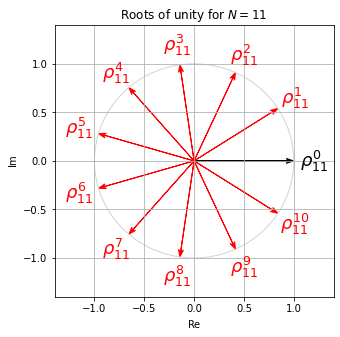

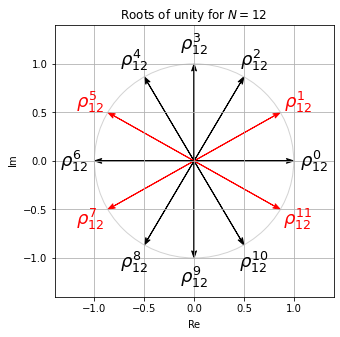

In [4]:
from math import gcd
import sys
sys.path.append('..')
import libfmp.c2

def plot_root_unity(N, figsize=(5, 5)): 
    root_unity = np.exp(2j * np.pi / N)
    root_unity_power = 1

    fig, ax = plt.subplots(figsize=figsize)
    plt.grid()  
    plt.xlim([-1.4, 1.4])
    plt.ylim([-1.4, 1.4])
    plt.xlabel('$\mathrm{Re}$')
    plt.ylabel('$\mathrm{Im}$')
    plt.title('Roots of unity for $N=%d$'%N)

    for n in range(0, N):
        colorPlot = 'r' if gcd(n, N) == 1 else 'k'
        libfmp.c2.plot_vector(root_unity_power, color=colorPlot)
        plt.text(np.real(1.2*root_unity_power), np.imag(1.2*root_unity_power), 
                 r'$\rho_{%s}^{%s}$' % (N, n), size='18', 
                 color=colorPlot, ha='center', va='center')
        root_unity_power *= root_unity

    circle_unit = plt.Circle((0, 0), 1, color='lightgray', fill=0)   
    ax.add_artist(circle_unit)

plot_root_unity(N=8)    
plot_root_unity(N=11)
plot_root_unity(N=12)

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> and <a href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow">Frank Zalkow</a>.
</div>  

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>